## EDA Turkish Music Emotion 

#### Exploración de Datos 

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [163]:
# Cambiar path de acuerdo a donde se tenga guardado el dataset.
path = r'C:\Users\55144\OneDrive - ArcelorMittal\Documents\GitHub\mlops_team_20\notebooks\Data background\data\raw\Acoustic Features.csv'
music_df = pd.read_csv(path)
music_df.head()

Class  _RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
0  relax            0.052            0.591              9.136      130.043   
1  relax            0.125            0.439              6.680      142.240   
2  relax            0.046            0.639             10.578      188.154   
3  relax            0.135            0.603             10.442       65.991   
4  relax            0.066            0.591              9.769       88.890   

   _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  ...  \
0         3.997         0.363         0.887         0.078         0.221  ...   
1         4.058         0.516         0.785         0.397         0.556  ...   
2         2.775         0.903         0.502         0.329         0.287  ...   
3         2.841         1.552         0.612         0.351         0.011  ...   
4         3.217         0.228         0.814         0.096         0.434  ...   

   _Chromagram_Mean_9  _Chromagram_Mean_10  _Chromagram_Mean_11  \
0               0.426                1.000                0.008   
1               0.002                1.000                0.000   
2               0.184                0.746                0.016   
3               0.038                1.000                0.161   
4               0.004                0.404                1.000   

   _Chromagram_Mean_12  _HarmonicChangeDetectionFunction_Mean  \
0                0.101                                  0.316   
1                0.984                                  0.285   
2                1.000                                  0.413   
3                0.757                                  0.422   
4                0.001                                  0.345   

   _HarmonicChangeDetectionFunction_Std  \
0                                 0.261   
1                                 0.211   
2                                 0.299   
3                                 0.265   
4                                 0.261   

   _HarmonicChangeDetectionFunction_Slope  \
0                                   0.018   
1                                  -0.082   
2                                   0.134   
3                                   0.042   
4                                   0.089   

   _HarmonicChangeDetectionFunction_PeriodFreq  \
0                                        1.035   
1                                        3.364   
2                                        1.682   
3                                        0.354   
4                                        0.748   

   _HarmonicChangeDetectionFunction_PeriodAmp  \
0                                       0.593   
1                                       0.702   
2                                       0.692   
3                                       0.743   
4                                       0.674   

   _HarmonicChangeDetectionFunction_PeriodEntropy  
0                                           0.970  
1                                           0.967  
2                                           0.963  
3                                           0.968  
4                                           0.957  

[5 rows x 51 columns]

## Estadisticas descriptivas 

In [164]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

In [165]:
music_df.head().T

0         1          2  \
Class                                              relax     relax      relax   
_RMSenergy_Mean                                    0.052     0.125      0.046   
_Lowenergy_Mean                                    0.591     0.439      0.639   
_Fluctuation_Mean                                  9.136      6.68     10.578   
_Tempo_Mean                                      130.043    142.24    188.154   
_MFCC_Mean_1                                       3.997     4.058      2.775   
_MFCC_Mean_2                                       0.363     0.516      0.903   
_MFCC_Mean_3                                       0.887     0.785      0.502   
_MFCC_Mean_4                                       0.078     0.397      0.329   
_MFCC_Mean_5                                       0.221     0.556      0.287   
_MFCC_Mean_6                                       0.118     0.799       0.14   
_MFCC_Mean_7                                      -0.151    -0.403     -0.246   
_MFCC_Mean_8                                      -0.131    -0.264      0.025   
_MFCC_Mean_9                                       0.129    -0.057     -0.112   
_MFCC_Mean_10                                      0.154     0.288     -0.422   
_MFCC_Mean_11                                      0.274     0.309      0.018   
_MFCC_Mean_12                                      0.232     0.049      0.179   
_MFCC_Mean_13                                      0.246     0.027      0.138   
_Roughness_Mean                                   51.542   336.839     39.864   
_Roughness_Slope                                   0.325     0.366      0.224   
_Zero-crossingrate_Mean                          403.129   204.886    685.474   
_AttackTime_Mean                                   0.028     0.015      0.033   
_AttackTime_Slope                                 -0.014    -0.079     -0.278   
_Rolloff_Mean                                   1844.664  1181.067  10778.651   
_Eventdensity_Mean                                 1.336     1.336      1.336   
_Pulseclarity_Mean                                 0.082     0.051      0.299   
_Brightness_Mean                                   0.173     0.117      0.496   
_Spectralcentroid_Mean                          1121.368   896.047    4181.11   
_Spectralspread_Mean                            1970.389  1959.622   4716.084   
_Spectralskewness_Mean                             3.621     4.134      0.902   
_Spectralkurtosis_Mean                            18.037     21.99      2.366   
_Spectralflatness_Mean                              0.03     0.025      0.091   
_EntropyofSpectrum_Mean                            0.806     0.765      0.897   
_Chromagram_Mean_1                                 0.496       0.0      0.412   
_Chromagram_Mean_2                                   0.0     0.142      0.245   
_Chromagram_Mean_3                                 0.047     0.137      0.526   
_Chromagram_Mean_4                                  0.03     0.076      0.095   
_Chromagram_Mean_5                                 0.314     0.112      0.519   
_Chromagram_Mean_6                                 0.038       0.0      0.001   
_Chromagram_Mean_7                                 0.024      0.12      0.563   
_Chromagram_Mean_8                                 0.951       0.0      0.282   
_Chromagram_Mean_9                                 0.426     0.002      0.184   
_Chromagram_Mean_10                                  1.0       1.0      0.746   
_Chromagram_Mean_11                                0.008       0.0      0.016   
_Chromagram_Mean_12                                0.101     0.984        1.0   
_HarmonicChangeDetectionFunction_Mean              0.316     0.285      0.413   
_HarmonicChangeDetectionFunction_Std               0.261     0.211      0.299   
_HarmonicChangeDetectionFunction_Slope             0.018    -0.082      0.134   
_HarmonicChangeDetectionFunction_PeriodFreq        1.035     3.364      1.682   
_Harm

In [166]:
music_df.describe().T

count         mean  \
_RMSenergy_Mean                                 400.0     0.134650   
_Lowenergy_Mean                                 400.0     0.553605   
_Fluctuation_Mean                               400.0     7.145932   
_Tempo_Mean                                     400.0   123.682020   
_MFCC_Mean_1                                    400.0     2.456422   
_MFCC_Mean_2                                    400.0     0.071890   
_MFCC_Mean_3                                    400.0     0.488065   
_MFCC_Mean_4                                    400.0     0.030465   
_MFCC_Mean_5                                    400.0     0.178897   
_MFCC_Mean_6                                    400.0     0.038307   
_MFCC_Mean_7                                    400.0     0.059943   
_MFCC_Mean_8                                    400.0     0.043467   
_MFCC_Mean_9                                    400.0     0.023010   
_MFCC_Mean_10                                   400.0     0.027793   
_MFCC_Mean_11                                   400.0     0.028798   
_MFCC_Mean_12                                   400.0     0.016667   
_MFCC_Mean_13                                   400.0     0.024118   
_Roughness_Mean                                 400.0   527.681365   
_Roughness_Slope                                400.0     0.072038   
_Zero-crossingrate_Mean                         400.0   997.252315   
_AttackTime_Mean                                400.0     0.031305   
_AttackTime_Slope                               400.0    -0.002890   
_Rolloff_Mean                                   400.0  5691.069637   
_Eventdensity_Mean                              400.0     2.784820   
_Pulseclarity_Mean                              400.0     0.249387   
_Brightness_Mean                                400.0     0.434158   
_Spectralcentroid_Mean                          400.0  2581.167267   
_Spectralspread_Mean                            400.0  3082.394695   
_Spectralskewness_Mean                          400.0     1.870035   
_Spectralkurtosis_Mean                          400.0     7.348953   
_Spectralflatness_Mean                          400.0     0.048523   
_EntropyofSpectrum_Mean                         400.0     0.872607   
_Chromagram_Mean_1                              400.0     0.352560   
_Chromagram_Mean_2                              400.0     0.253035   
_Chromagram_Mean_3                              400.0     0.365098   
_Chromagram_Mean_4                              400.0     0.208295   
_Chromagram_Mean_5                              400.0     0.350412   
_Chromagram_Mean_6                              400.0     0.263880   
_Chromagram_Mean_7                              400.0     0.242797   
_Chromagram_Mean_8                              400.0     0.391873   
_Chromagram_Mean_9                              400.0     0.354632   
_Chromagram_Mean_10                             400.0     0.590975   
_Chromagram_Mean_11                             400.0     0.342340   
_Chromagram_Mean_12                             400.0     0.385620   
_HarmonicChangeDetectionFunction_Mean           400.0     0.328213   
_HarmonicChangeDetectionFunction_Std            400.0     0.192997   
_HarmonicChangeDetectionFunction_Slope          400.0    -0.000157   
_HarmonicChangeDetectionFunction_PeriodFreq     400.0     1.762288   
_HarmonicChangeDetectionFunction_PeriodAmp      400.0     0.769690   
_HarmonicChangeDetectionFunction_PeriodEntropy  400.0     0.966712   

                                                        std      min  \
_RMSenergy_Mean                                    0.064368    0.010   
_Lowenergy_Mean                                    0.050750    0.302   
_Fluctuation_Mean                                  2.280145    3.580   
_Tempo_Mean                                       34.234344   48.284   
_MFCC_Mean_1                                       0.799262    0.323   
_MFCC_Mean_2                                 

Porcentaje de valores faltantes por columna.

In [167]:
# Se encuentran los valores faltantes de todo el df asiganadolo a la variable missing_values 
missing_values=pd.isna(music_df)
# Se suman los valores faltantes 
missing_values_s=missing_values.sum()
# Se divide entre el largo de todo el df para obtener la relacion de %
percent=missing_values_s/len(missing_values)
# Se usa el metodo apply con el formato en porcentaje para mostrar los valores faltantes por columna.
print('Percentage of missing values in the data set: \n\n', percent.apply('{:.2%}'.format))

Percentage of missing values in the data set: 

 Class                                             0.00%
_RMSenergy_Mean                                   0.00%
_Lowenergy_Mean                                   0.00%
_Fluctuation_Mean                                 0.00%
_Tempo_Mean                                       0.00%
_MFCC_Mean_1                                      0.00%
_MFCC_Mean_2                                      0.00%
_MFCC_Mean_3                                      0.00%
_MFCC_Mean_4                                      0.00%
_MFCC_Mean_5                                      0.00%
_MFCC_Mean_6                                      0.00%
_MFCC_Mean_7                                      0.00%
_MFCC_Mean_8                                      0.00%
_MFCC_Mean_9                                      0.00%
_MFCC_Mean_10                                     0.00%
_MFCC_Mean_11                                     0.00%
_MFCC_Mean_12                                     0.00%

## Visualizations

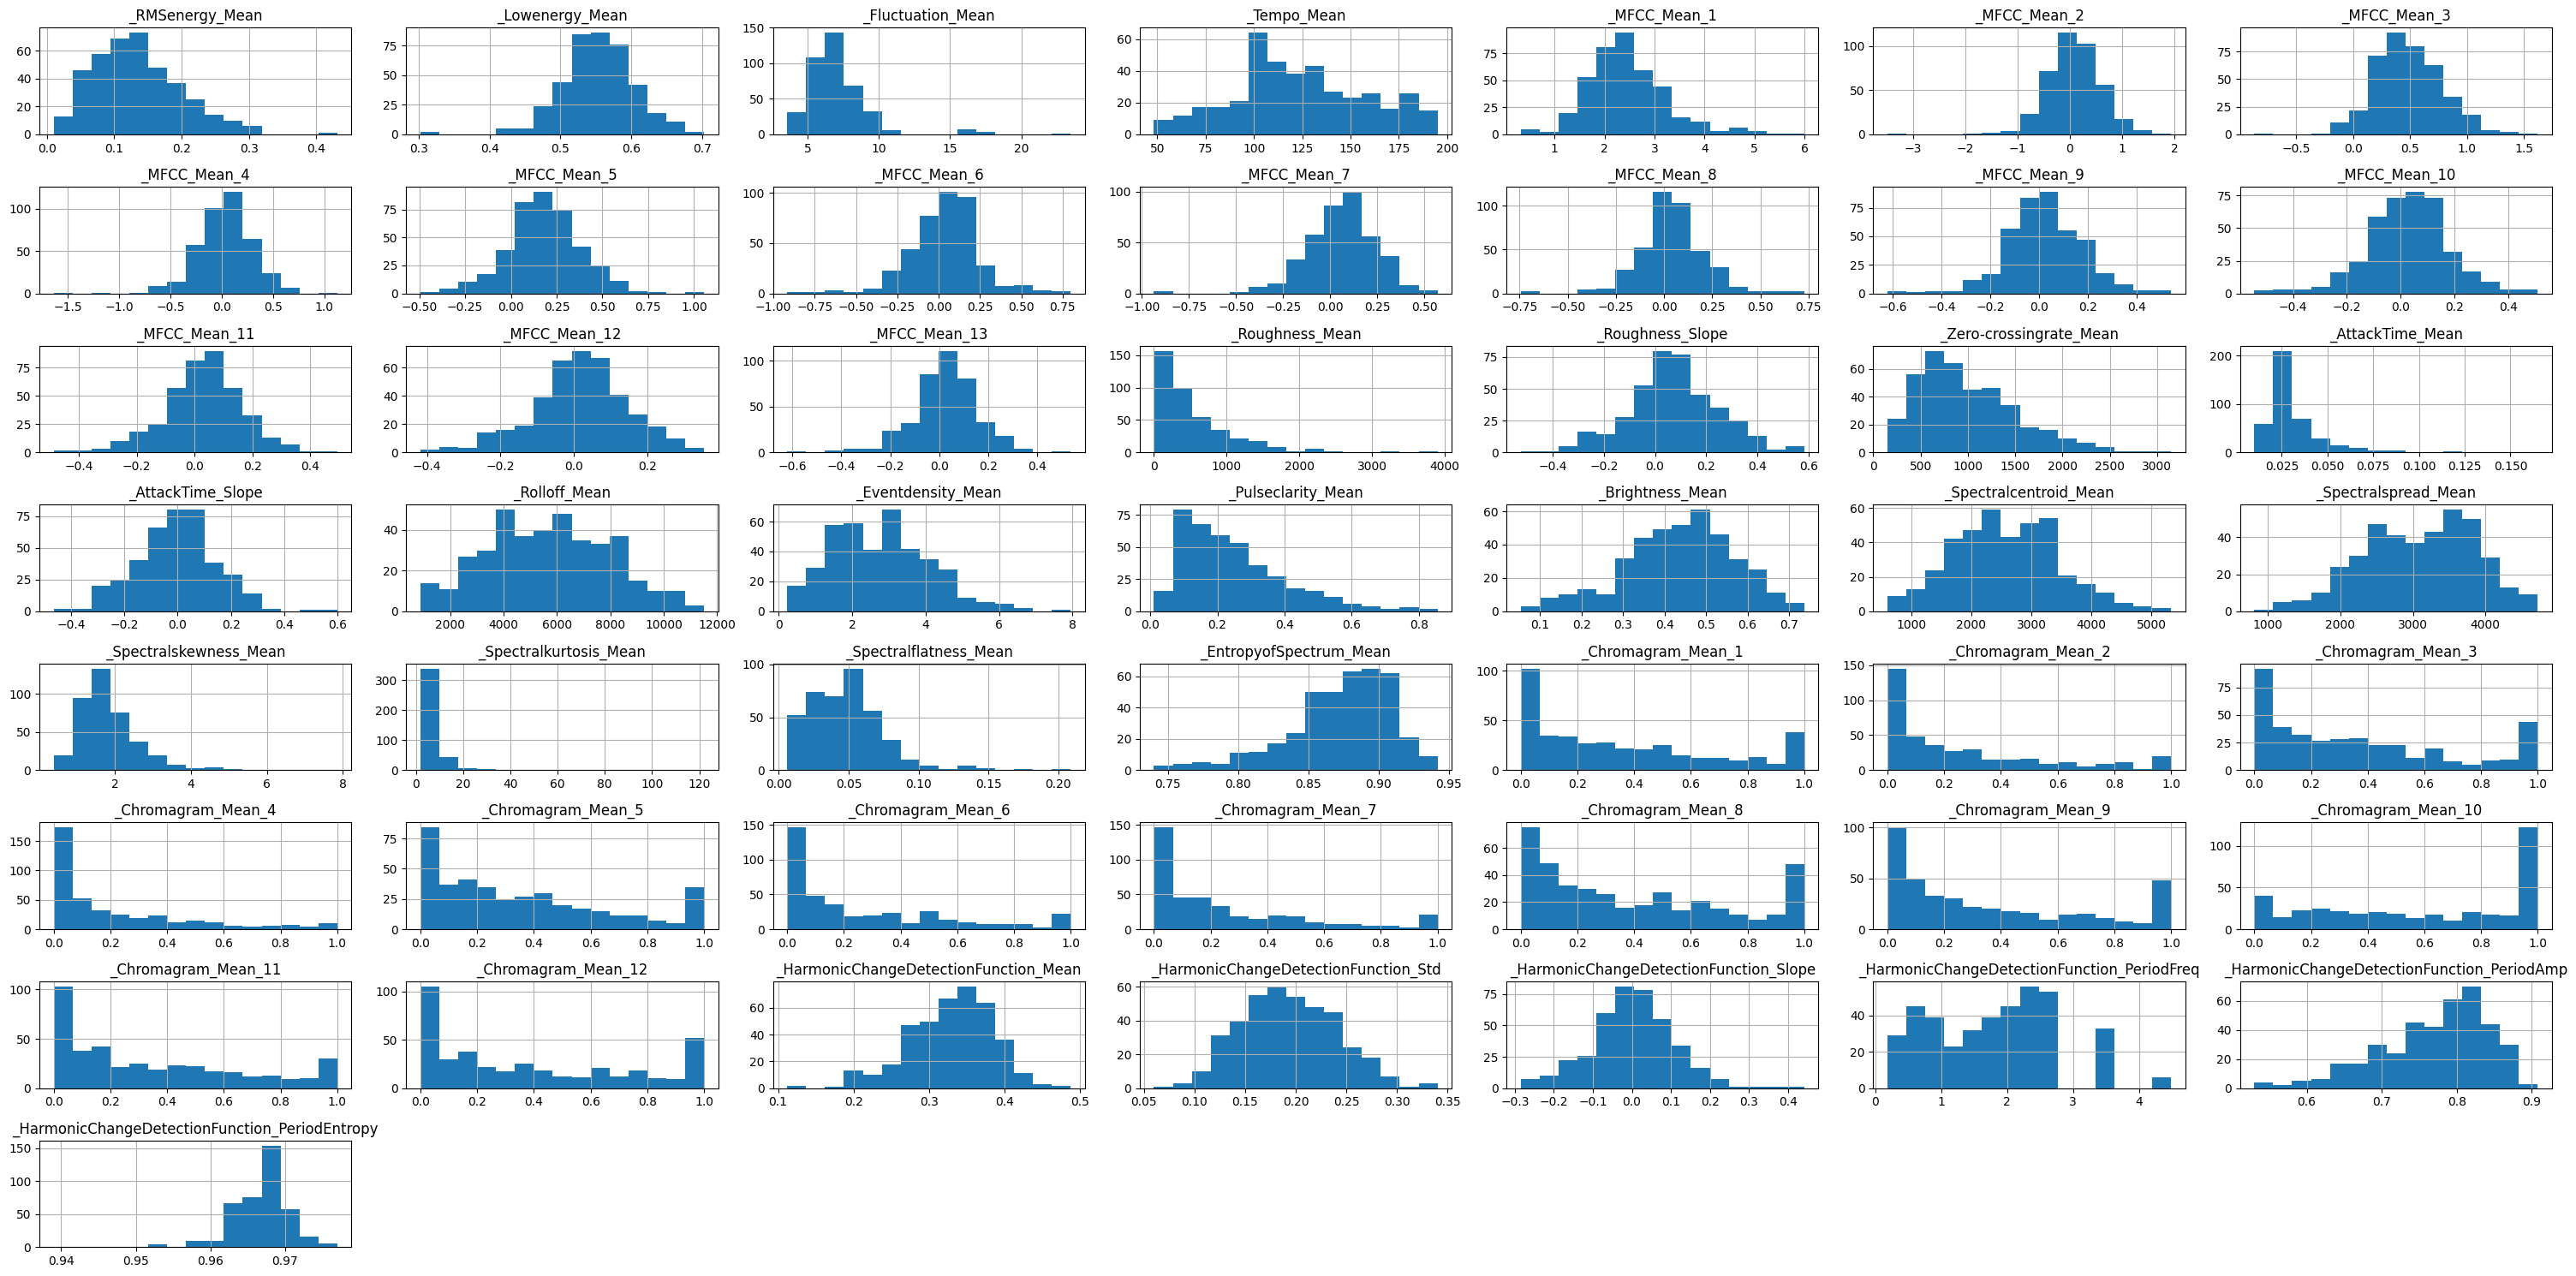

In [168]:
# Revisar distribucion de datos de algunas caracteristicas
music_df.hist(bins=15, figsize=(30, 15))
plt.tight_layout()
plt.show()

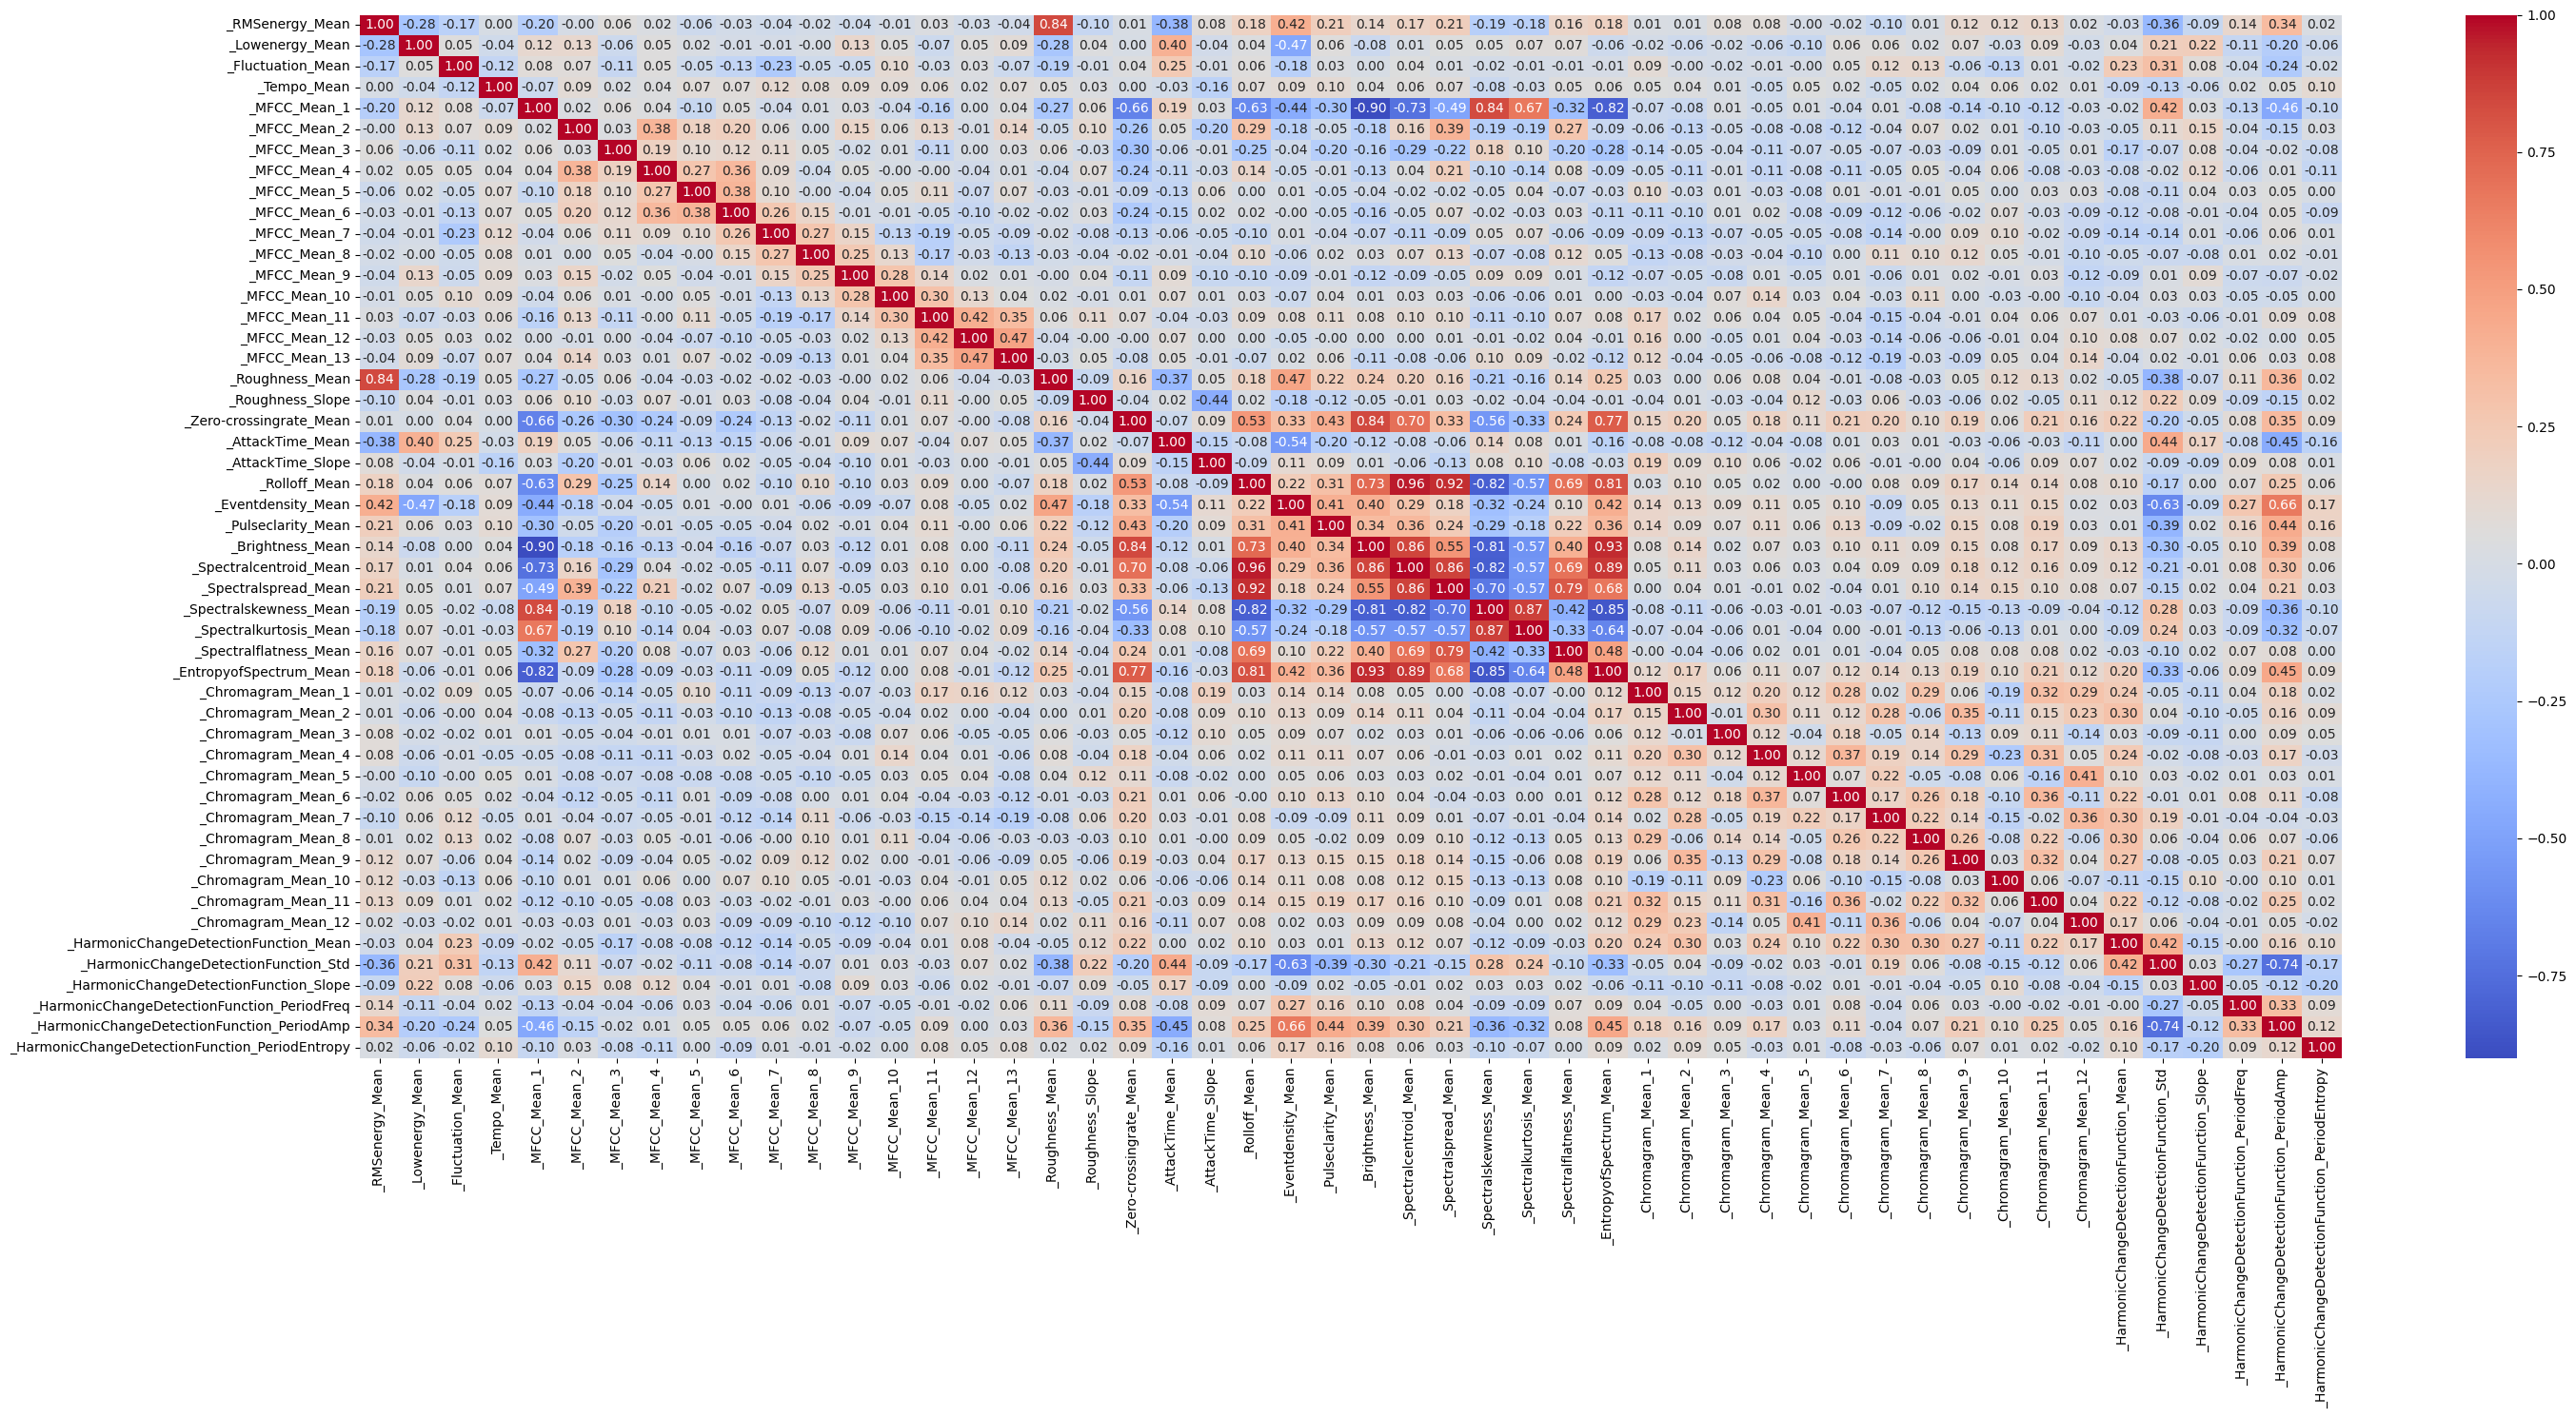

In [169]:
# observar correlaciones 
plt.figure(figsize=(30, 15))
sns.heatmap(music_df.drop('Class',axis=1).corr(), annot=True, fmt=".2f", cmap='coolwarm') # Se excluye la variable Class ya que es el target a clasificar a partir de las caracteristicas.
plt.tight_layout()
plt.show()

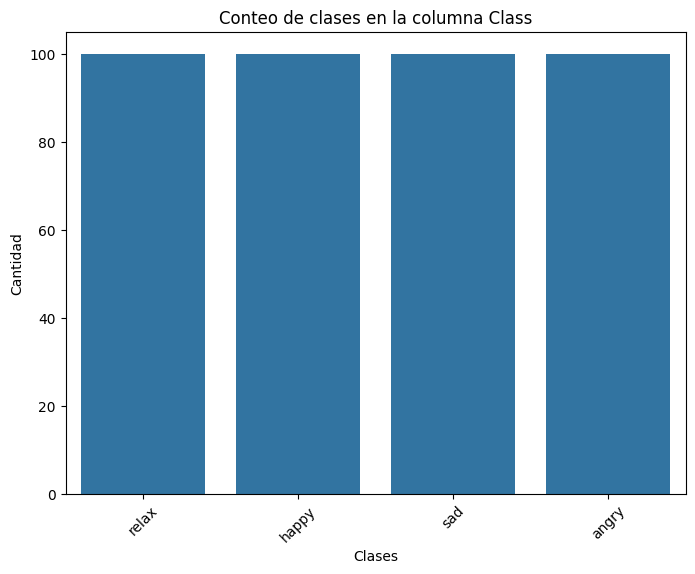

In [170]:
# Crear un gráfico de barras
plt.figure(figsize=(8,6))
sns.barplot(x=conteo_clases.index, y=conteo_clases.values)

plt.title('Conteo de clases en la columna Class')
plt.xlabel('Clases')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

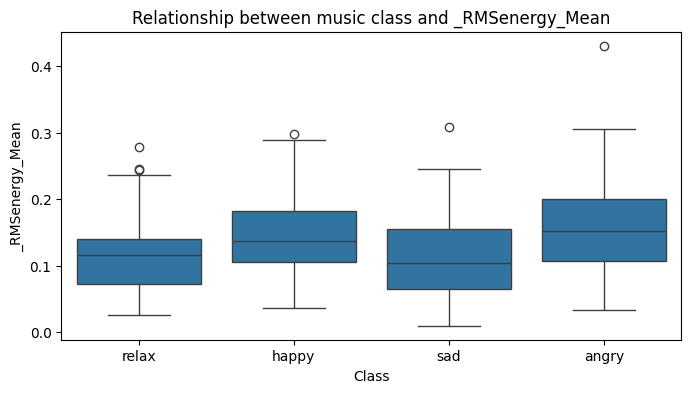

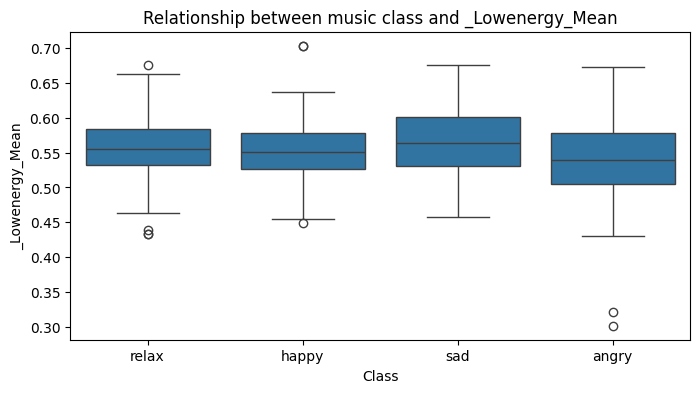

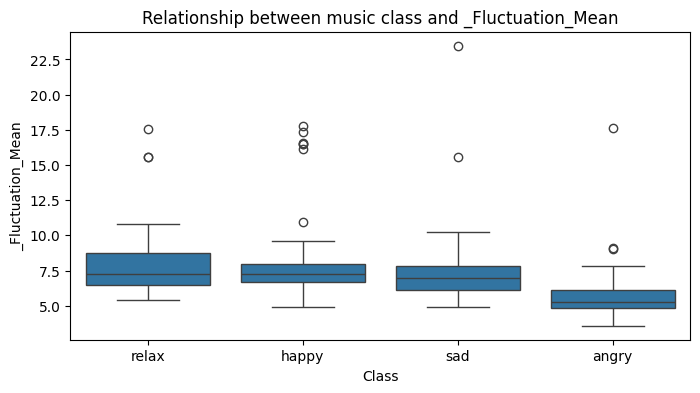

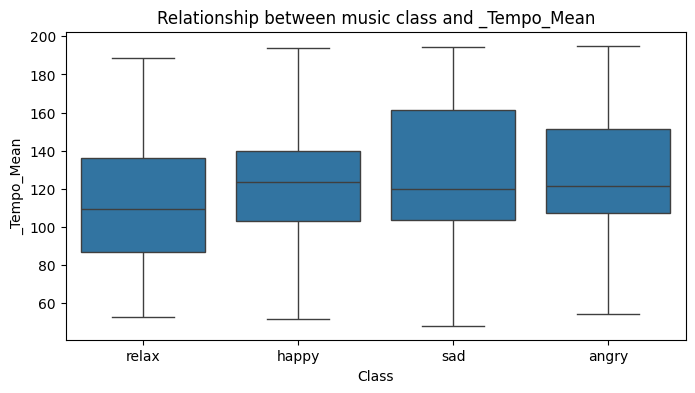

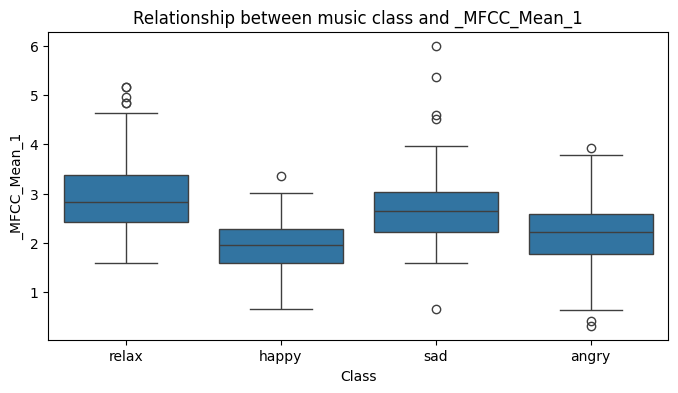

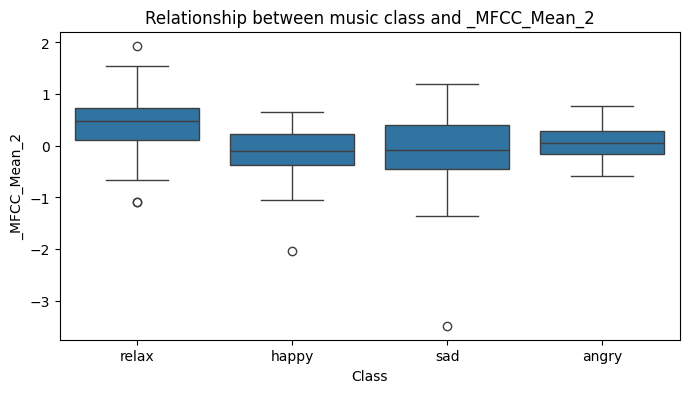

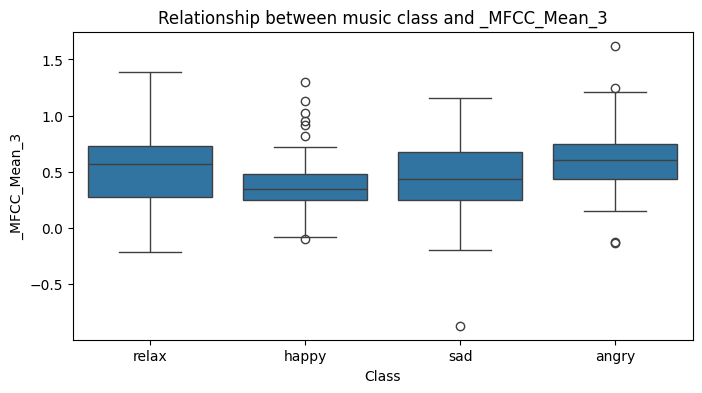

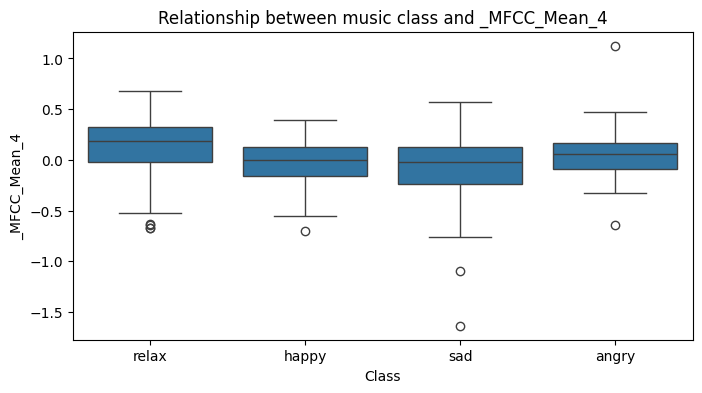

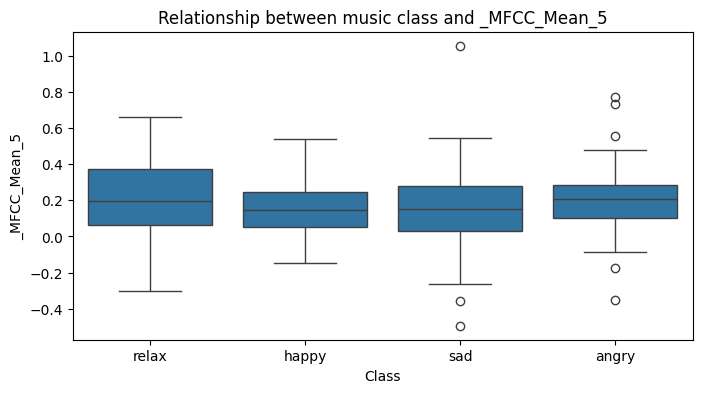

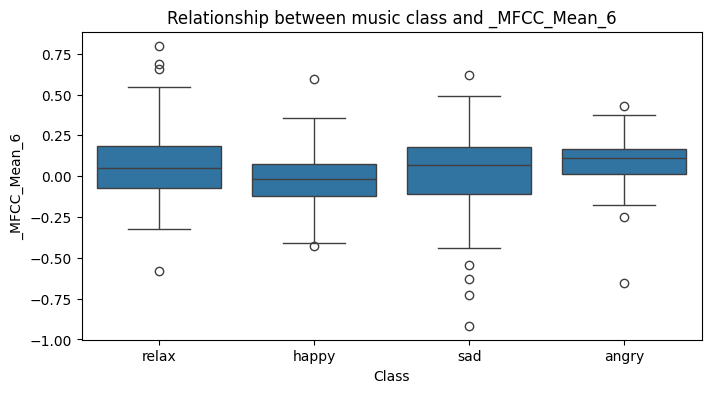

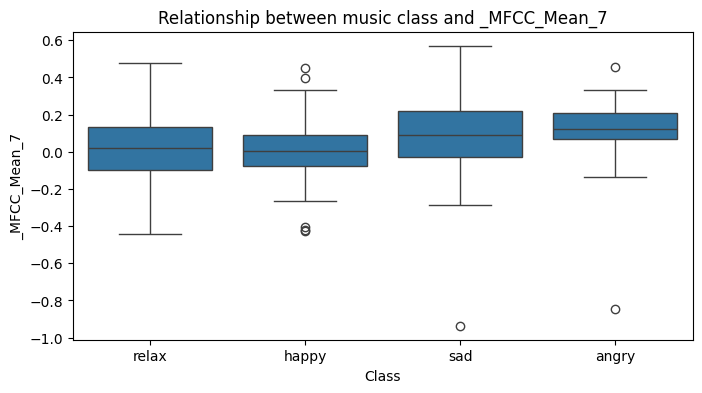

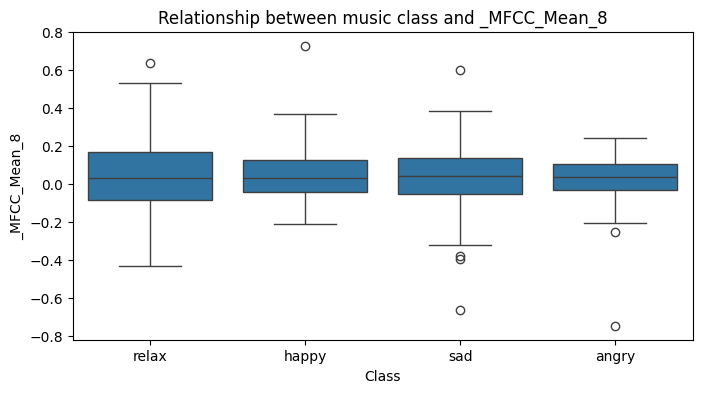

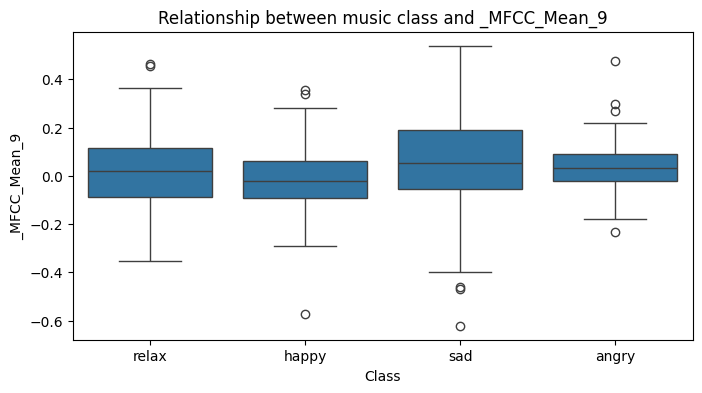

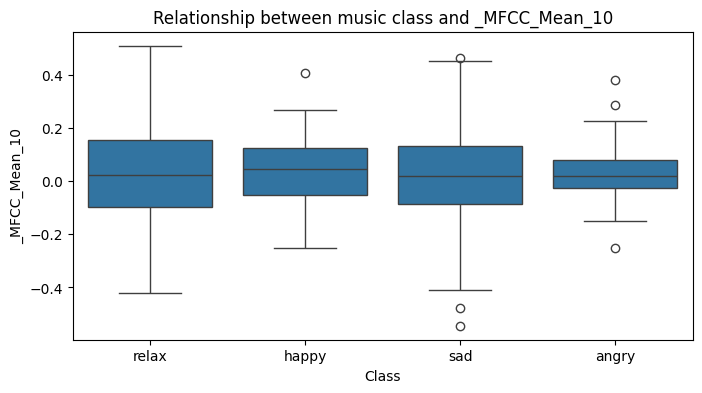

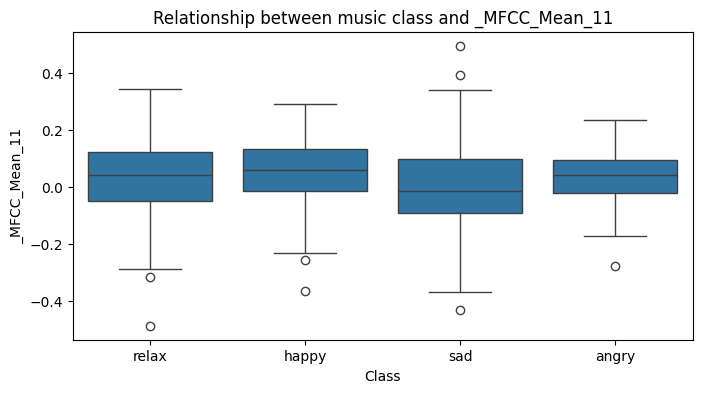

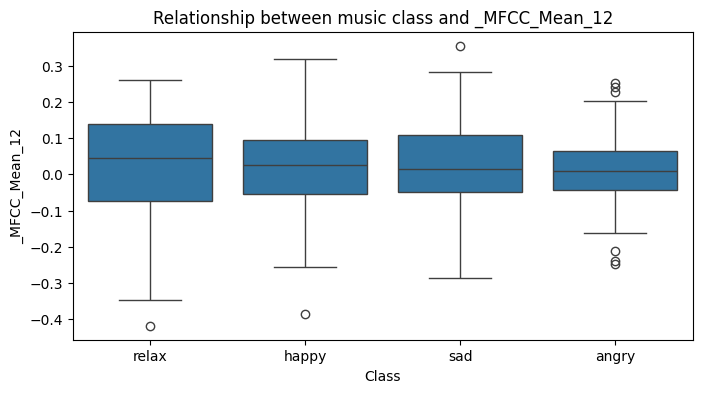

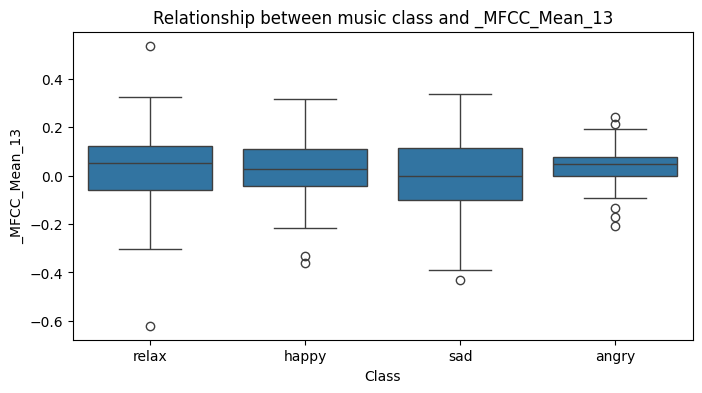

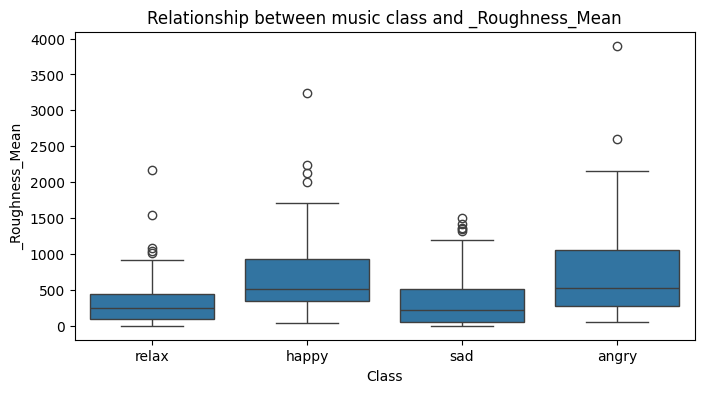

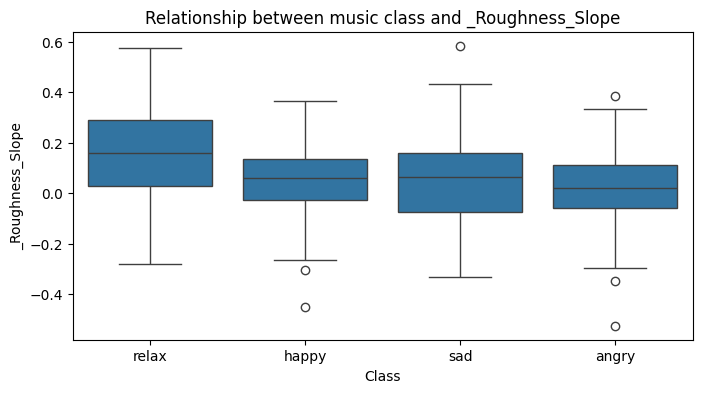

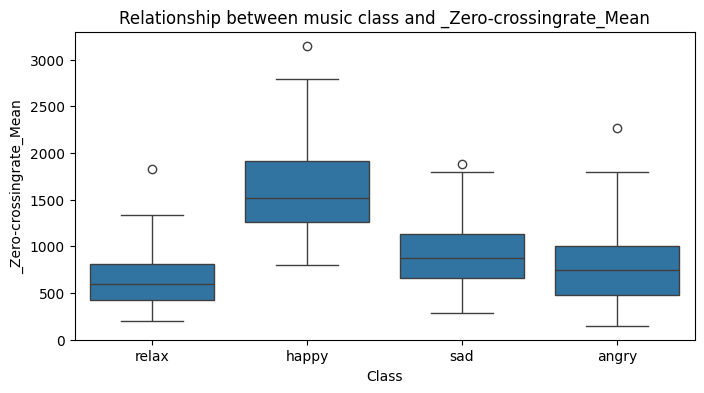

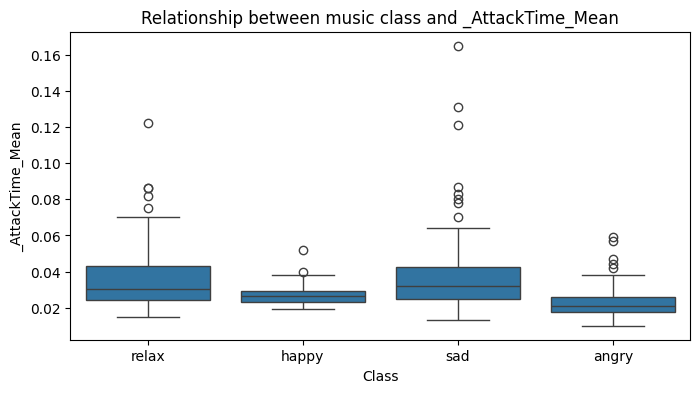

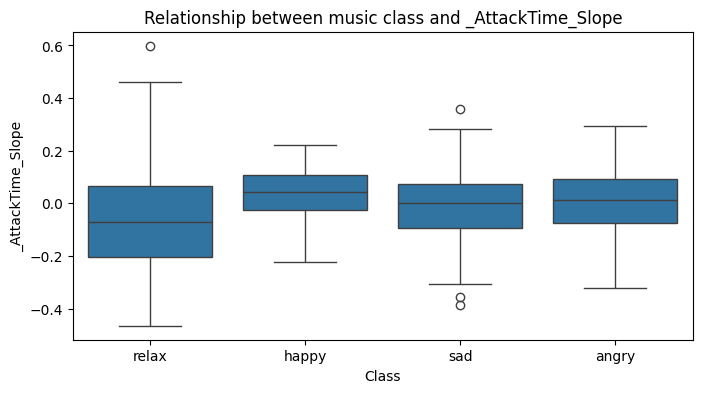

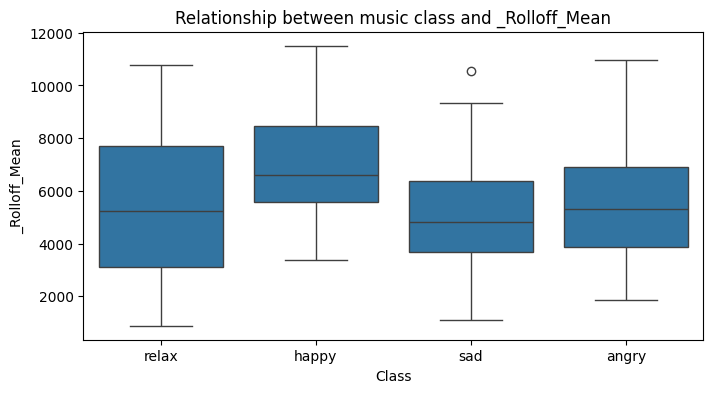

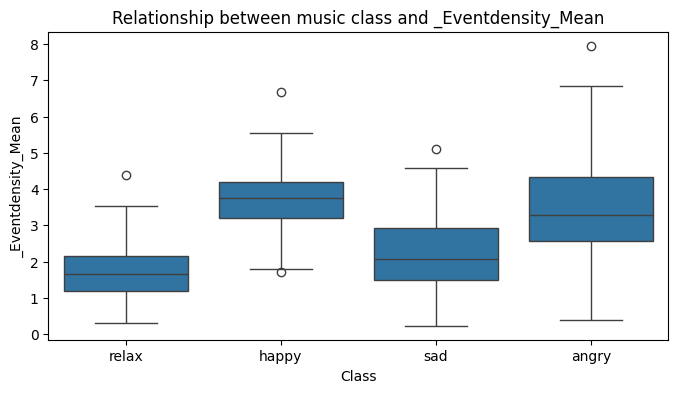

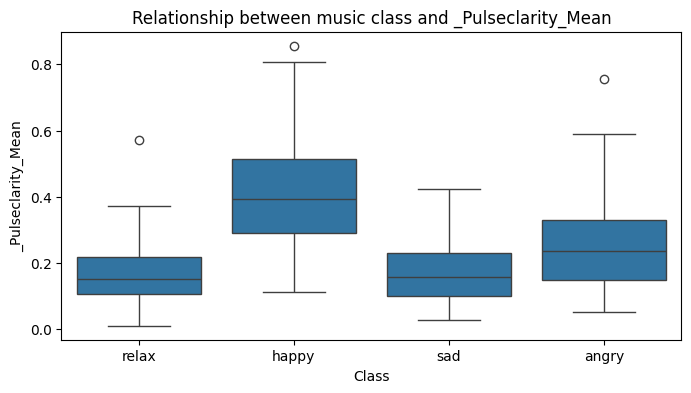

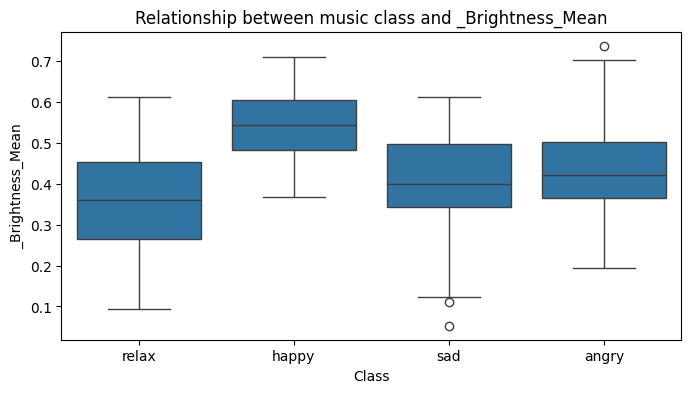

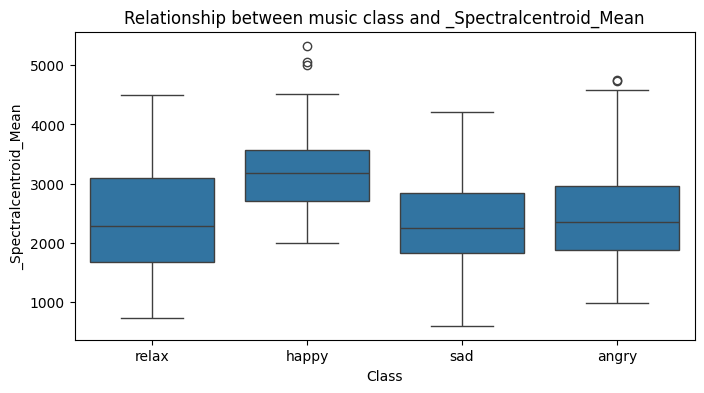

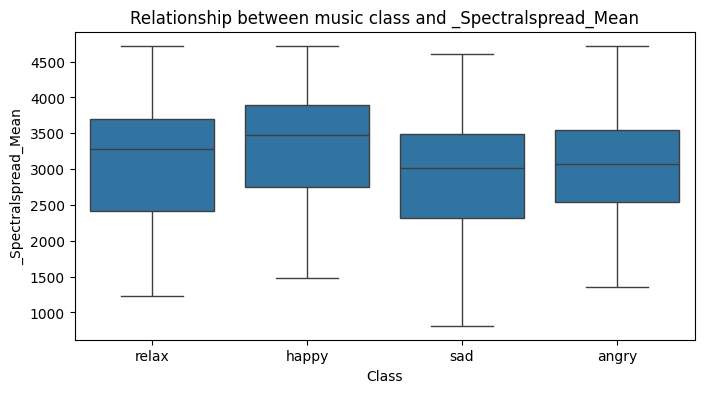

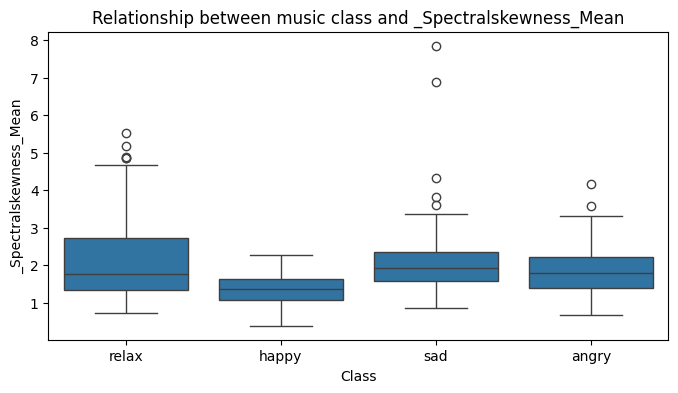

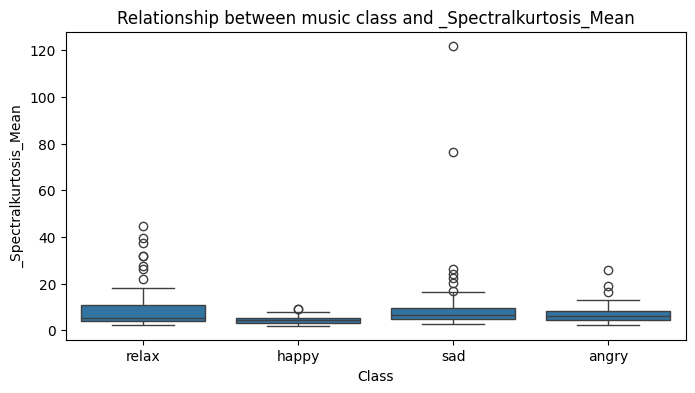

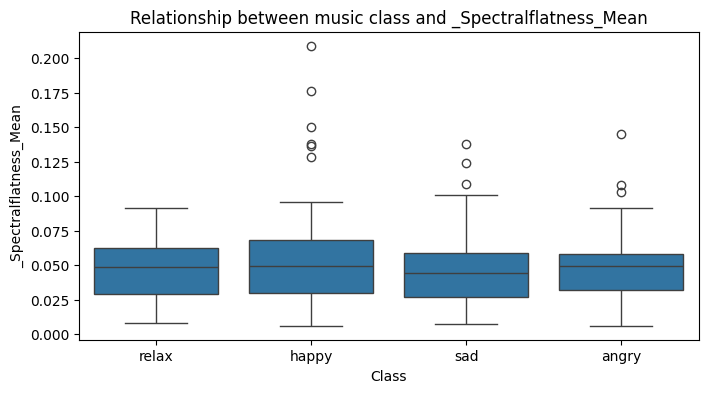

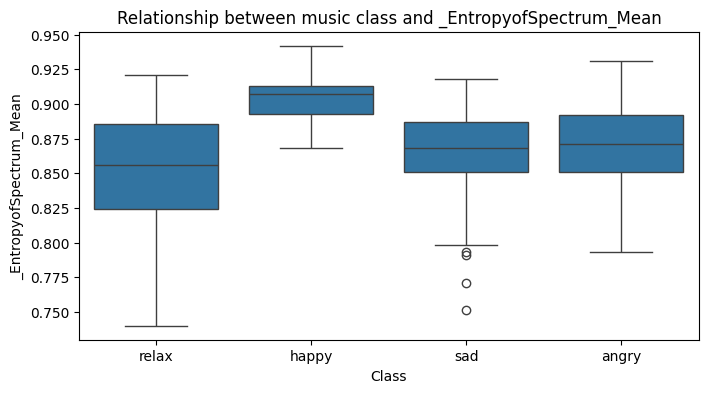

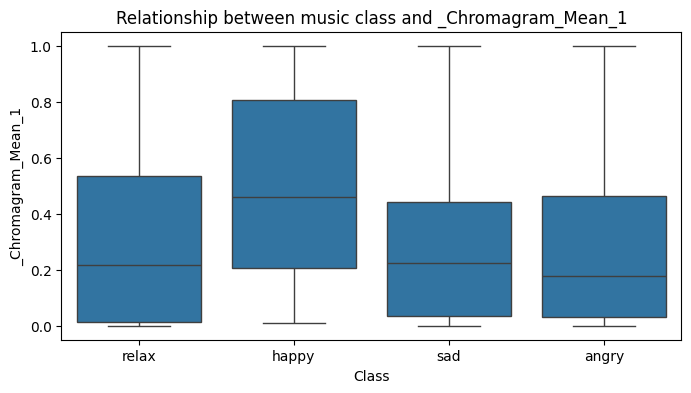

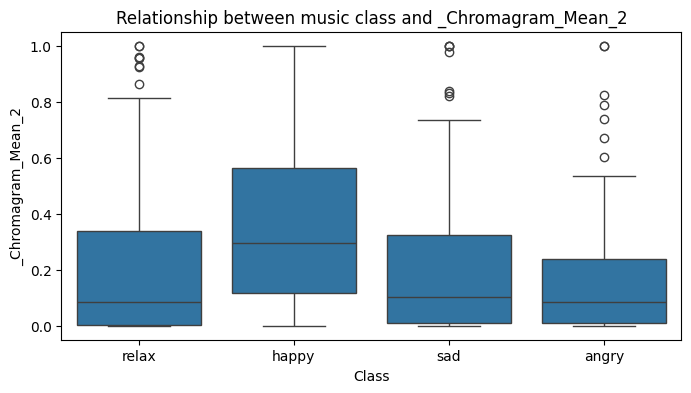

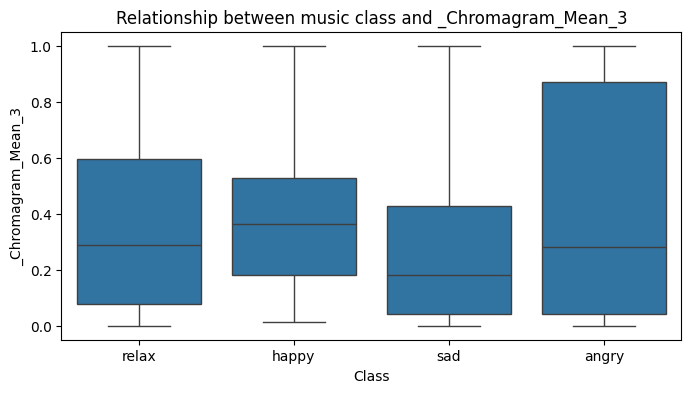

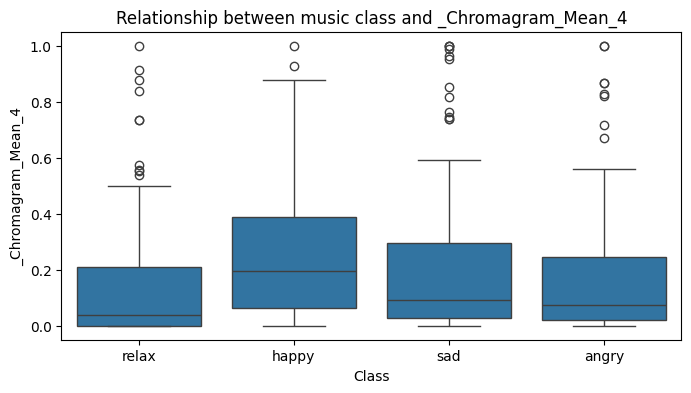

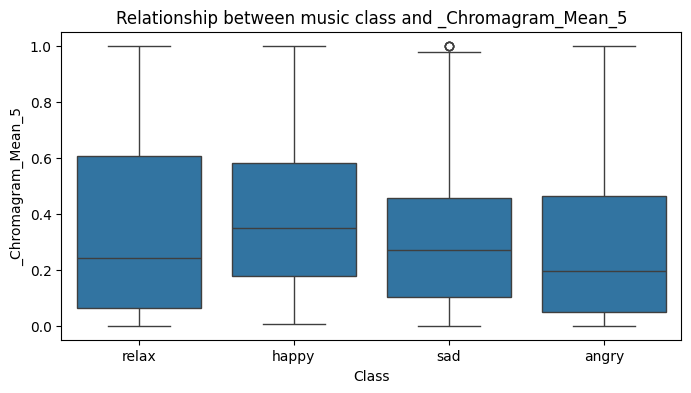

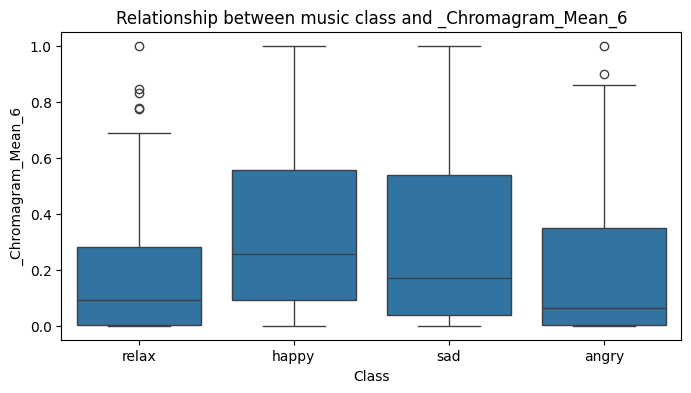

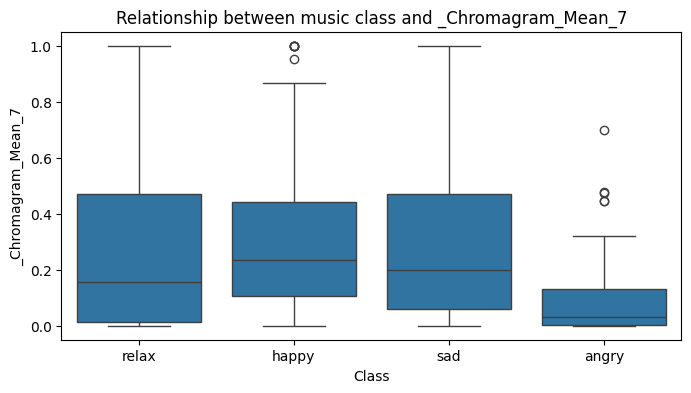

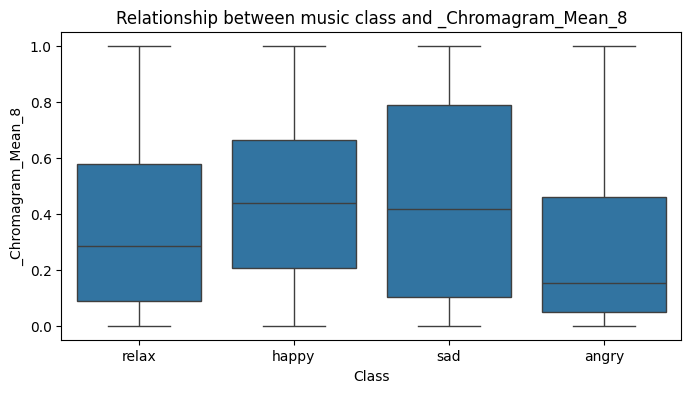

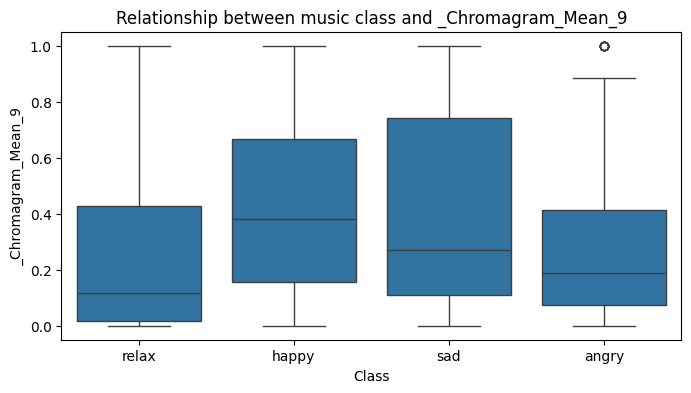

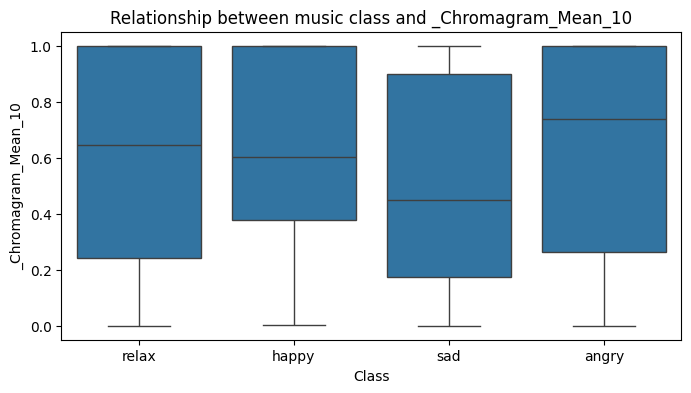

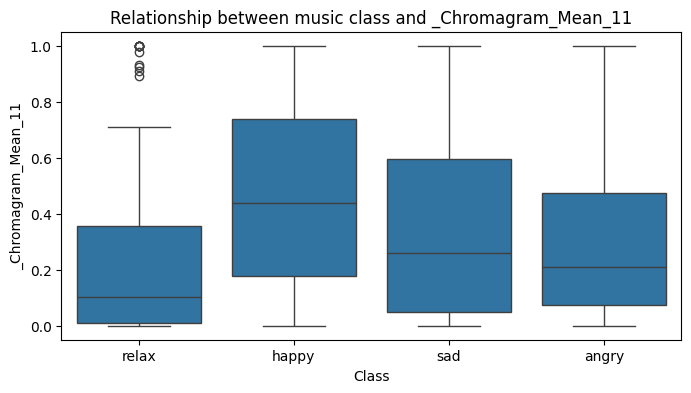

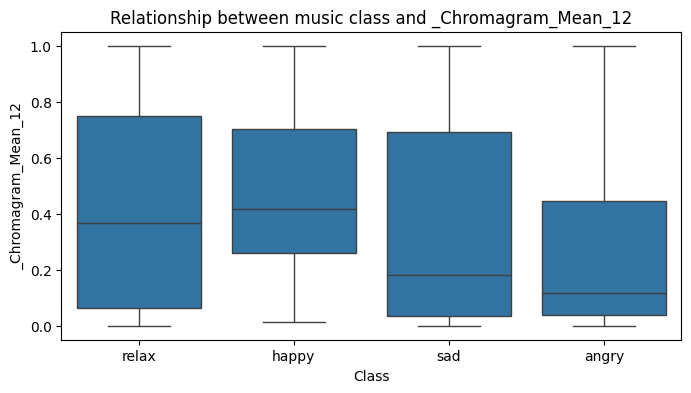

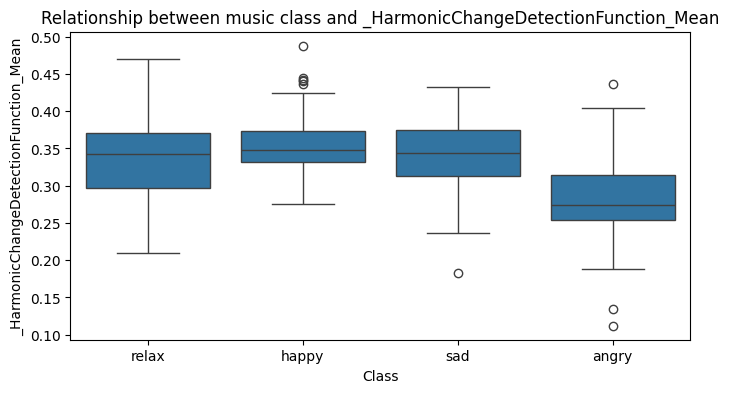

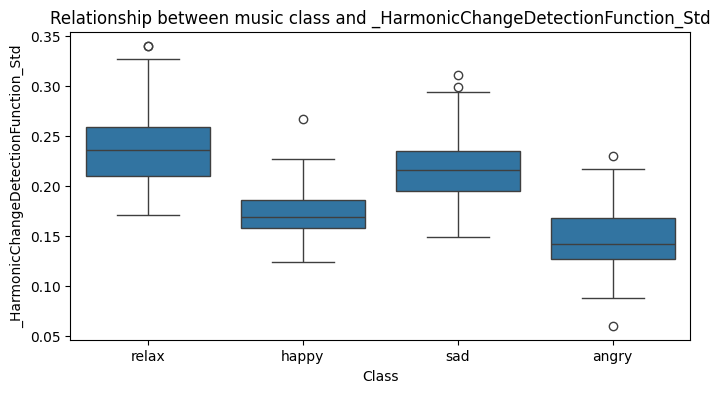

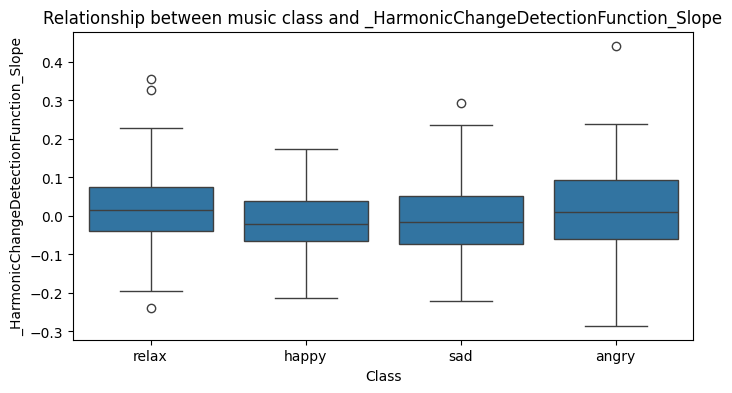

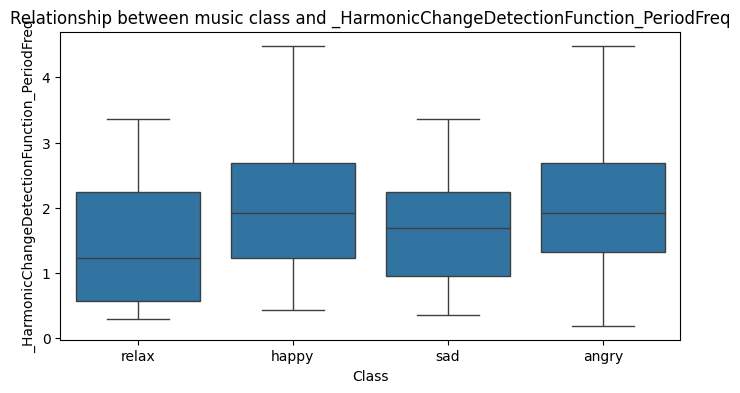

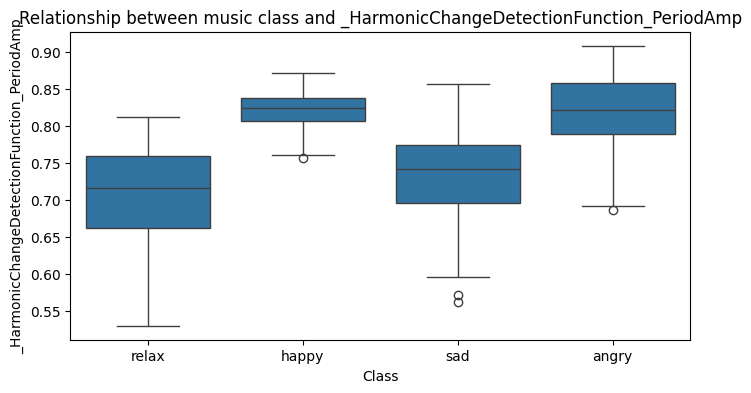

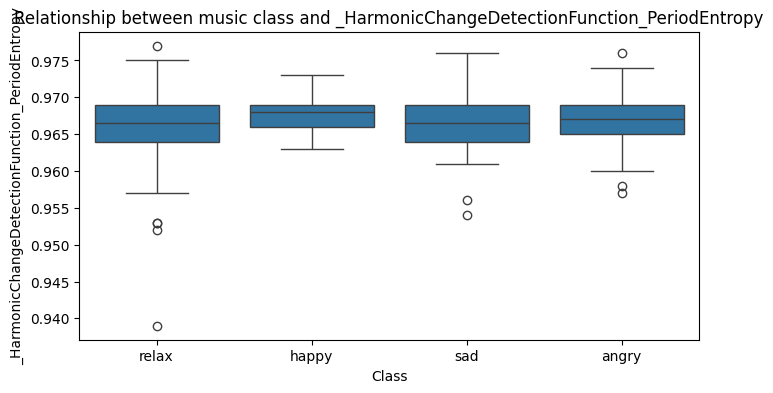

In [171]:
# Define el nombre de la columna que deseas excluir
column_to_exclude = 'Class'  # Reemplaza con el nombre de la columna que quieres quitar

# Crea una lista de columnas para graficar excluyendo la columna no deseada
columns_to_plot = [col for col in music_df.columns if col != column_to_exclude and col != 'Class']
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Class', y=column, data=music_df)
    plt.title(f'Relationship between music class and {column}')
    plt.show()

## Preprocesamiento de datos 

In [172]:
scaler = StandardScaler()

# Seleccionar solo las columnas flotantes que quieres escalar
float_columns = music_df.select_dtypes(include=['float'])
# Aplicar el escalado Standard
df_standardized = pd.DataFrame(scaler.fit_transform(float_columns), columns=float_columns.columns)

df_standardized

_RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
0          -1.285628         0.737775           0.873874     0.186040   
1          -0.150107        -2.261070          -0.204599     0.542765   
2          -1.378958         1.684779           1.507082     1.885613   
3           0.005444         0.974526           1.447362    -1.687290   
4          -1.067857         0.737775           1.151836    -1.017563   
..               ...              ...                ...          ...   
395         0.612093         0.481295          -0.825951     1.095651   
396         0.643203        -1.097045          -0.923874     1.640903   
397         0.814309         0.066981          -1.063514     0.302706   
398         0.083220         0.382649          -1.175050    -0.294869   
399        -0.756755        -1.550817          -0.791700     0.820846   

     _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  \
0        1.929915      0.541910      1.355820      0.172545      0.215926   
1        2.006331      0.826724      1.009163      1.330466      1.933997   
2        0.399089      1.547136      0.047359      1.083636      0.554411   
3        0.481769      2.755269      0.421205      1.163493     -0.861074   
4        0.952792      0.290603      1.107723      0.237882      1.308311   
..            ...           ...           ...           ...           ...   
395      0.662161     -0.012826      0.781457      0.056390      0.441583   
396      0.417880     -0.409332     -0.496416     -0.150512     -0.768760   
397     -0.982663      0.919800      1.332030     -0.520756      0.333883   
398     -0.575529     -0.524747      0.699891      0.212473      0.138997   
399     -0.271117     -0.159887      1.175695     -0.186810      0.851868   

     _MFCC_Mean_6  ...  _Chromagram_Mean_9  _Chromagram_Mean_10  \
0        0.391612  ...            0.213319             1.144018   
1        3.738068  ...           -1.054027             1.144018   
2        0.499720  ...           -0.510025             0.433595   
3        0.514462  ...           -0.946422             1.144018   
4        1.212255  ...           -1.048049            -0.522958   
..            ...  ...                 ...                  ...   
395      0.322815  ...            0.057890             0.690914   
396      0.003403  ...           -1.000225             1.144018   
397      0.863359  ...           -0.904576            -1.138284   
398      0.116426  ...           -0.650509             1.144018   
399      1.118888  ...           -0.764092             1.144018   

     _Chromagram_Mean_11  _Chromagram_Mean_12  \
0              -1.060005            -0.818623   
1              -1.085369             1.721059   
2              -1.034642             1.767078   
3              -0.574928             1.068162   
4               2.085073            -1.106243   
..                   ...                  ...   
395             0.224023            -0.749595   
396             0.943714            -1.080357   
397            -0.175452            -0.818623   
398            -0.121555            -0.706452   
399            -0.787347            -1.014205   

     _HarmonicChangeDetectionFunction_Mean  \
0                                -0.220241   
1                                -0.779298   
2                                 1.529065   
3                                 1.691372   
4                                 0.302747   
..                                     ...   
395                              -0.094003   
396                              -1.717071   
397                              -1.067844   
398                              -0.923571   
399                              -2.402366   

     _HarmonicChangeDetectionFunction_Std  \
0                                1.445837   
1                                0.382761   
2                                2.253775   
3                                1.530883   
4                              

In [173]:
# Crear el LabelEncoder
label_encoder = LabelEncoder()

# Ajustar y transformar la columna 'Class'
music_df_class_encoded = label_encoder.fit_transform(music_df['Class']) + 1  # +1 para empezar desde 1

# Convertir a DataFrame
df_class_encoded = pd.DataFrame(music_df_class_encoded, columns=['Class_encoded'])


df_class_encoded


Class_encoded
0                3
1                3
2                3
3                3
4                3
..             ...
395              1
396              1
397              1
398              1
399              1

[400 rows x 1 columns]

In [174]:
# Unir usando join para tener el dataframe para unirlo 
df_joined = df_standardized.join(df_class_encoded, how='inner')
df_joined

_RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
0          -1.285628         0.737775           0.873874     0.186040   
1          -0.150107        -2.261070          -0.204599     0.542765   
2          -1.378958         1.684779           1.507082     1.885613   
3           0.005444         0.974526           1.447362    -1.687290   
4          -1.067857         0.737775           1.151836    -1.017563   
..               ...              ...                ...          ...   
395         0.612093         0.481295          -0.825951     1.095651   
396         0.643203        -1.097045          -0.923874     1.640903   
397         0.814309         0.066981          -1.063514     0.302706   
398         0.083220         0.382649          -1.175050    -0.294869   
399        -0.756755        -1.550817          -0.791700     0.820846   

     _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  \
0        1.929915      0.541910      1.355820      0.172545      0.215926   
1        2.006331      0.826724      1.009163      1.330466      1.933997   
2        0.399089      1.547136      0.047359      1.083636      0.554411   
3        0.481769      2.755269      0.421205      1.163493     -0.861074   
4        0.952792      0.290603      1.107723      0.237882      1.308311   
..            ...           ...           ...           ...           ...   
395      0.662161     -0.012826      0.781457      0.056390      0.441583   
396      0.417880     -0.409332     -0.496416     -0.150512     -0.768760   
397     -0.982663      0.919800      1.332030     -0.520756      0.333883   
398     -0.575529     -0.524747      0.699891      0.212473      0.138997   
399     -0.271117     -0.159887      1.175695     -0.186810      0.851868   

     _MFCC_Mean_6  ...  _Chromagram_Mean_10  _Chromagram_Mean_11  \
0        0.391612  ...             1.144018            -1.060005   
1        3.738068  ...             1.144018            -1.085369   
2        0.499720  ...             0.433595            -1.034642   
3        0.514462  ...             1.144018            -0.574928   
4        1.212255  ...            -0.522958             2.085073   
..            ...  ...                  ...                  ...   
395      0.322815  ...             0.690914             0.224023   
396      0.003403  ...             1.144018             0.943714   
397      0.863359  ...            -1.138284            -0.175452   
398      0.116426  ...             1.144018            -0.121555   
399      1.118888  ...             1.144018            -0.787347   

     _Chromagram_Mean_12  _HarmonicChangeDetectionFunction_Mean  \
0              -0.818623                              -0.220241   
1               1.721059                              -0.779298   
2               1.767078                               1.529065   
3               1.068162                               1.691372   
4              -1.106243                               0.302747   
..                   ...                                    ...   
395            -0.749595                              -0.094003   
396            -1.080357                              -1.717071   
397            -0.818623                              -1.067844   
398            -0.706452                              -0.923571   
399            -1.014205                              -2.402366   

     _HarmonicChangeDetectionFunction_Std  \
0                                1.445837   
1                                0.382761   
2                                2.253775   
3                                1.530883   
4                                1.445837   
..                                    ...   
395                             -1.126808   
396                             -1.403208   
397                             -0.765362   
398                             -1.041762   
399                             -1.764654   

     _HarmonicChangeDetectionFunction_Sl

# Splitting the dataset

In [175]:
from sklearn.model_selection import train_test_split

X = df_joined.drop('Class_encoded', axis=1)
y = df_joined['Class_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model

In [176]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
model = LogisticRegression(solver='lbfgs',
                           C=0.2,
                           random_state=42)

# Ajustar el modelo
model.fit(X_train, y_train)

LogisticRegression(C=0.2, random_state=42)

# Evaluating the model

In [177]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

In [178]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy},\n')
print(f'Confusion Matrix:\n{confusion},\n')
print(f'Classification Report:\n{report}')

Accuracy: 0.7875,

Confusion Matrix:
[[13  2  1  2]
 [ 0 17  1  0]
 [ 1  0 23  2]
 [ 2  2  4 10]],

Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.72      0.76        18
           2       0.81      0.94      0.87        18
           3       0.79      0.88      0.84        26
           4       0.71      0.56      0.62        18

    accuracy                           0.79        80
   macro avg       0.78      0.78      0.77        80
weighted avg       0.78      0.79      0.78        80



# Improving the model

In [179]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Average accuracy with CV:", np.mean(scores))

Average accuracy with CV: 0.8
